# Python Libraries Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Raed Datatset: Colombia Events

In [3]:
# Specify the folder path
data = pd.read_excel('file3.xlsx')   

In [4]:
data.head()

,Country,Month,Year,Events,Fatalities
0,Cambodia,January,2010,5,2
1,Cambodia,February,2010,2,0
2,Cambodia,March,2010,14,7
3,Cambodia,April,2010,4,1
4,Cambodia,May,2010,1,0


# Check Duplicated & Null Values

In [5]:
# Check Null Values
if data.isnull().any().any():
    print('Datasets Contain Null Values.... Process on')
    data.dropna()
    print('Your Dataset is clean No Null Values')
else:
    print('Dataset is clean No Dupliacted Values')

Dataset is clean No Dupliacted Values


In [6]:
# Check Duplicated Values
if (data.duplicated()).sum() !=0:
    print('Datasets Contain Duplicated Values.... Process on')
    data.drop_duplicates()
    print('Your Dataset is clean')
else:
    print('Dataset is clean No Null Values')

Dataset is clean No Null Values


# Feature Engineering and Data Type Transformation

In [92]:
# Convert the 'Year' column to integers for proper numerical operations
data['Year'] = data['Year'].astype(int)

# Convert the 'Month' column to a categorical data type for more efficient storage and analysis
data['Month'] = data['Month'].astype('category')

# Convert the 'Country' column to a categorical data type for more efficient storage and analysis
data['Country'] = data['Country'].astype('category')

# Statistical Moments : Location, Variability, Skewness, Kurtosis

In [71]:
# Group Features based on the type Numerical vs Categorical
cat_cols=data.select_dtypes(include=['object','category']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
Metrics = pd.DataFrame()
for column in num_cols:
    Metrics = Metrics._append({
        'Feature':column,
        'Mean':data[column].mean(),
        'Median':data[column].median(),
        'Range':data[column].max() - data[column].min(),
        'IQR':data[column].quantile(q=0.75) - data[column].quantile(q=0.25),
        'STD':data[column].std(),
        'Variance':data[column].var(),
        'Skewness [-1,1]':round(data[column].skew(),2),
        'Kurtosis[-2,2]':round(data[column].kurtosis(),2)
    },ignore_index=True)

# Iterate over each categorical column
for column in cat_cols:
    # Calculate the mode for the current column
    mode_value = data[column].mode().iloc[0]  # Get the first mode if there are multiple modes
    
    # Append the feature name and its mode to the mode_df DataFrame
    Metrics = Metrics._append({'Feature': column, 'Mode': mode_value}, ignore_index=True)

# Display the DataFrame with feature names and their corresponding modes 
Metrics.head(len(cat_cols)+len(num_cols))

,Feature,Mean,Median,Range,IQR,STD,Variance,"Skewness [-1,1]","Kurtosis[-2,2]",Mode
0,Year,2016.631579,2017.0,14.0,7.0,4.127233,17.034056,0.01,-1.20,NaN
1,Events,1.801170,1.0,14.0,2.5,2.287099,5.230822,2.76,11.18,NaN
2,Fatalities,0.690058,0.0,18.0,1.0,1.819135,3.309254,6.16,50.59,NaN
3,Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cambodia
4,Month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,February


Observation : Data is not well Ditributed bec it is affected by skewness, see below the form to confirm the observation, and skewness values above .

# Histogram Visualization & Kde plot

Year


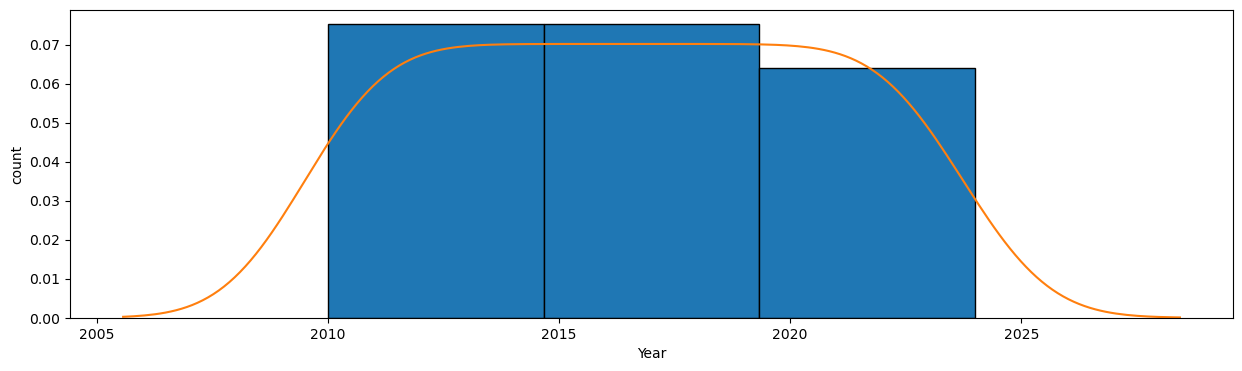

Events


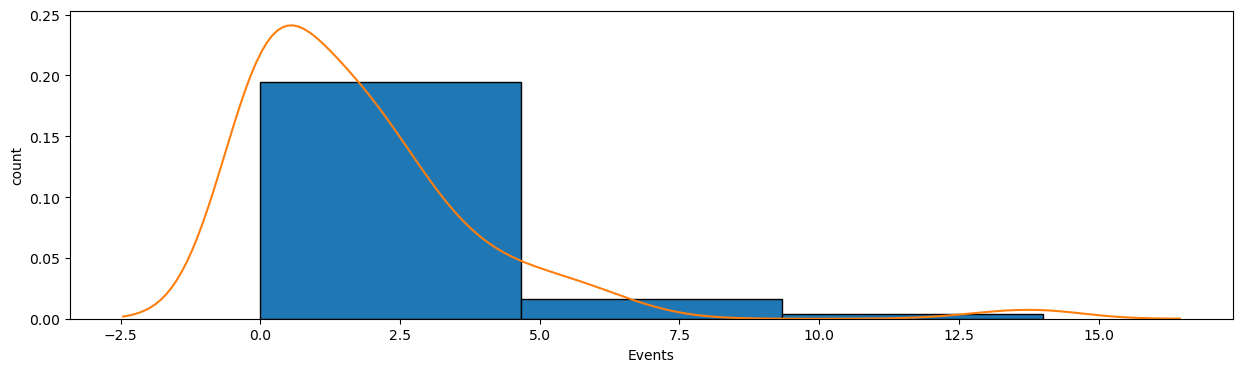

Fatalities


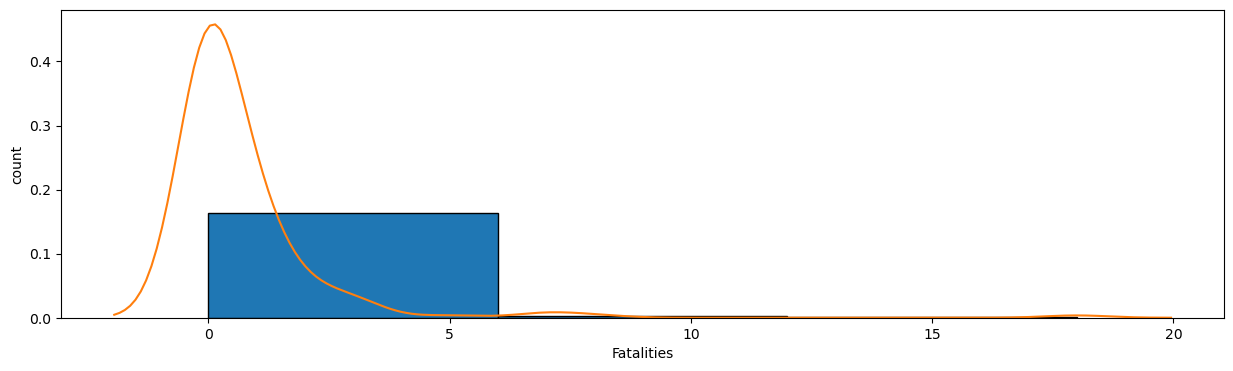

In [72]:
# let's visualize the Numerical Features
for col in num_cols:
    print(col)
    plt.figure(figsize = (15, 4))
    data[col].hist(grid=False,edgecolor='black',bins=3,density=True)
    sns.kdeplot(data[col])
    plt.ylabel('count')
    plt.show()

As you can see:
1. Events are right skewed.
2. Fatalities are right Skewed.

# Events & Fatalities group by year

In [78]:
# Group the data by 'year' and aggregate 'Events' and 'Fatalities' by summing them up
# This gives us the total number of events and fatalities for each year
events = data.groupby('Year').agg({'Events': 'sum', 'Fatalities': 'sum'}).reset_index()
events.head()

,Year,Events,Fatalities
0,2010,45,18
1,2011,55,35
2,2012,31,13
3,2013,39,7
4,2014,40,9


# Fatalities and Events per Year 

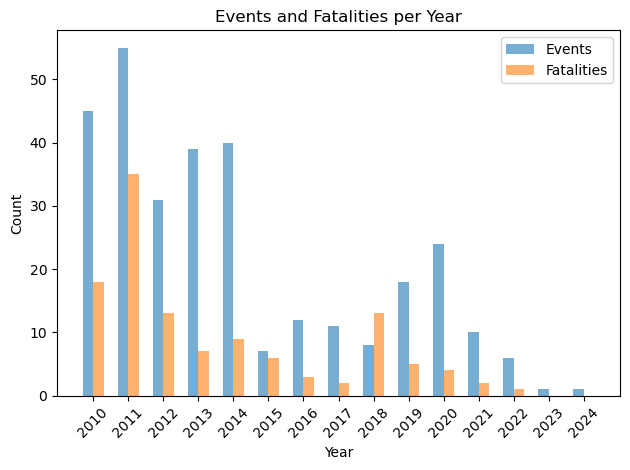

In [79]:
# Determine the width of each bar and the positions for the bar groups
bar_width = 0.3
index = np.arange(events.shape[0])  # Create an array with the positions of the bars

# Plotting the 'Events' bars
plt.bar(index, events['Events'], bar_width, label='Events', alpha=0.6)  # Plot 'Events' bars at the positions defined by 'index'

# Plotting the 'Fatalities' bars, shifted to the right by the width of the bars
plt.bar(index + bar_width, events['Fatalities'], bar_width, label='Fatalities', alpha=0.6)  # Plot 'Fatalities' bars next to 'Events'

# Adding labels and title
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.title('Events and Fatalities per Year')  # Title of the plot

# Set the position of the x-axis ticks to be in the center of the group of bars
plt.xticks(index + bar_width / 2, events['Year'], rotation=45)  # Rotate the labels on the x-axis for better readability

# Add a legend to the plot to identify the bars
plt.legend()

# Display the plot with a tight layout to ensure everything fits without overlapping
plt.tight_layout()
plt.show()


# Events per Year/Month 

In [94]:
# Ensure that 'Year' and 'Month' are in the correct format
# Find the maximum Events and Fatalities per year and corresponding months
events_max = data.loc[data.groupby('Year')['Events'].idxmax()]
fatalities_max = data.loc[data.groupby('Year')['Fatalities'].idxmax()]

# Merge the results to get the final DataFrame
eventsM = events_max[['Year', 'Events']].merge(
    fatalities_max[['Year', 'Fatalities']], on='Year')

# Add the corresponding month columns
eventsM['MonthE'] = events_max['Month'].values
eventsM['MonthF'] = fatalities_max['Month'].values


    Year  Events  Fatalities     MonthE    MonthF
0   2010      14           7      March     March
1   2011      14          18      April     April
2   2012       5           3    January     April
3   2013       6           2     August       May
4   2014       7           3      April     April
5   2015       3           3   November  November
6   2016       3           1     August      July
7   2017       3           1      March      July
8   2018       2           8      March     March
9   2019       6           1    January   January
10  2020       4           2   November  November
11  2021       2           1   February     April
12  2022       2           1      April     April
13  2023       1           0  September   January
14  2024       1           0      March   January


C:\Users\benmh\anaconda3\Lib\site-packages\pandas\core\arrays\categorical.py:537: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)
C:\Users\benmh\anaconda3\Lib\site-packages\pandas\core\arrays\categorical.py:537: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)


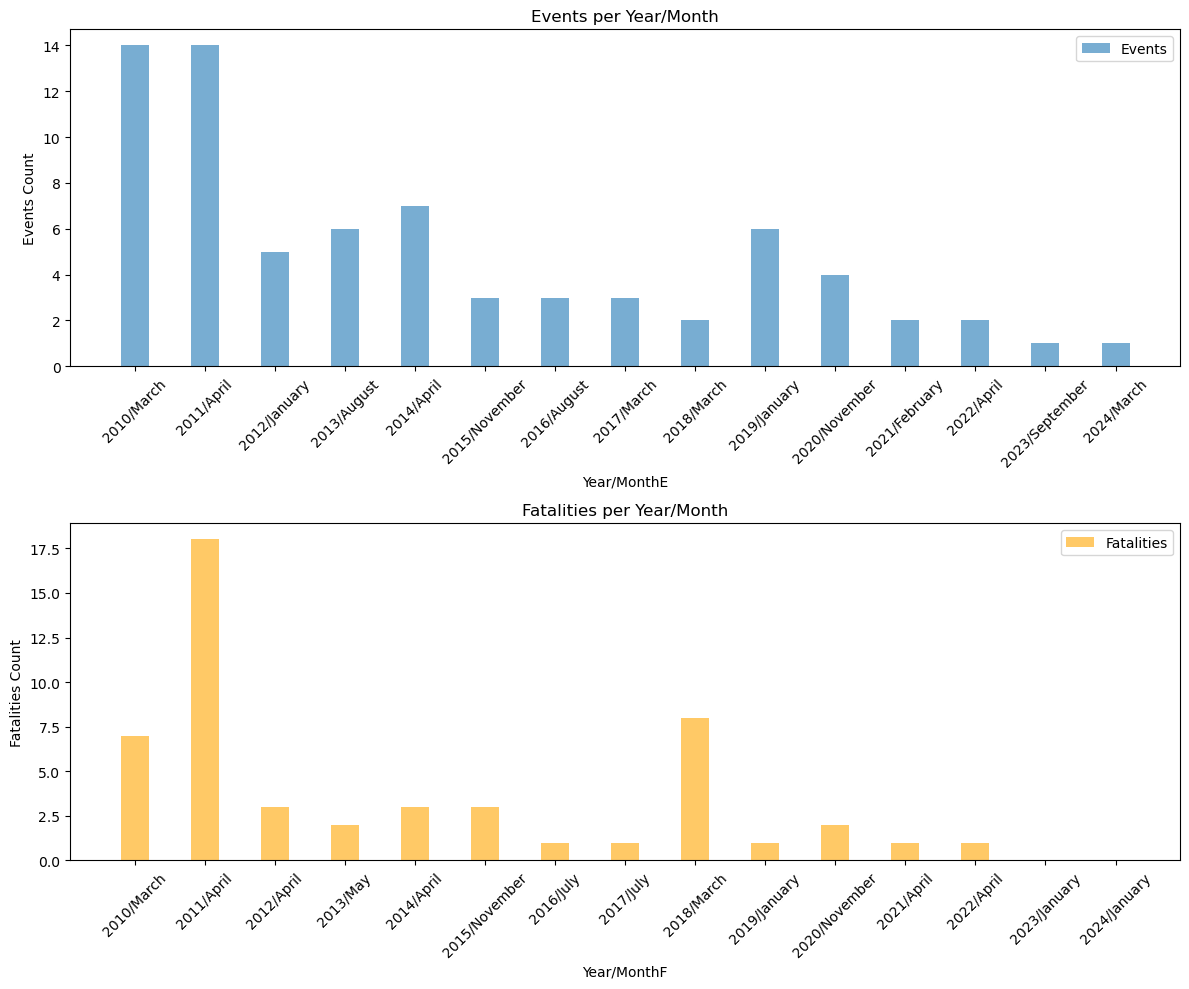

In [95]:
# Create labels for the x-axis
eventsM['Year_MonthE'] = eventsM['Year'].astype(str) + '/' + eventsM['MonthE'].astype(str)
eventsM['Year_MonthF'] = eventsM['Year'].astype(str) + '/' + eventsM['MonthF'].astype(str)

# Determine the width of each bar and the positions for the bar groups
bar_width = 0.4
index = np.arange(eventsM.shape[0])  # Create an array with the positions of the bars

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plotting the 'Events' bars
axes[0].bar(index, eventsM['Events'], bar_width, label='Events', alpha=0.6)
axes[0].set_xlabel('Year/MonthE')
axes[0].set_ylabel('Events Count')
axes[0].set_title('Events per Year/Month')
axes[0].set_xticks(index)
axes[0].set_xticklabels(eventsM['Year_MonthE'], rotation=45)
axes[0].legend()

# Plotting the 'Fatalities' bars
axes[1].bar(index, eventsM['Fatalities'], bar_width, label='Fatalities', alpha=0.6, color='orange')
axes[1].set_xlabel('Year/MonthF')
axes[1].set_ylabel('Fatalities Count')
axes[1].set_title('Fatalities per Year/Month')
axes[1].set_xticks(index)
axes[1].set_xticklabels(eventsM['Year_MonthF'], rotation=45)
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


# MultiVariate Analysis

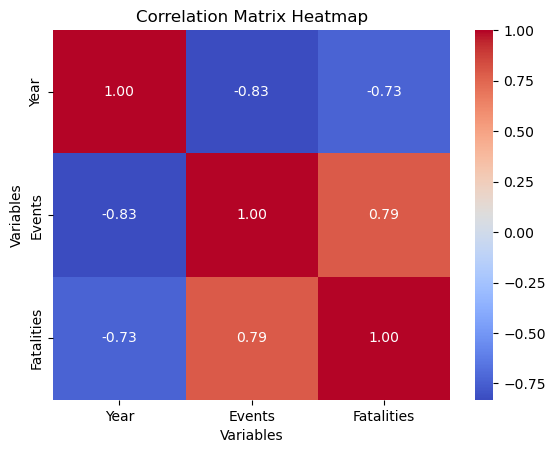

In [96]:
# Calculate the correlation matrix
matrix_corr = events.corr()

# Create a heatmap
sns.heatmap(matrix_corr, annot=True, fmt='.2f', cmap='coolwarm')

# Adding labels and title for clarity
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Display the heatmap
plt.show()

As we can see There is a strong correlation between Fatalities and Events

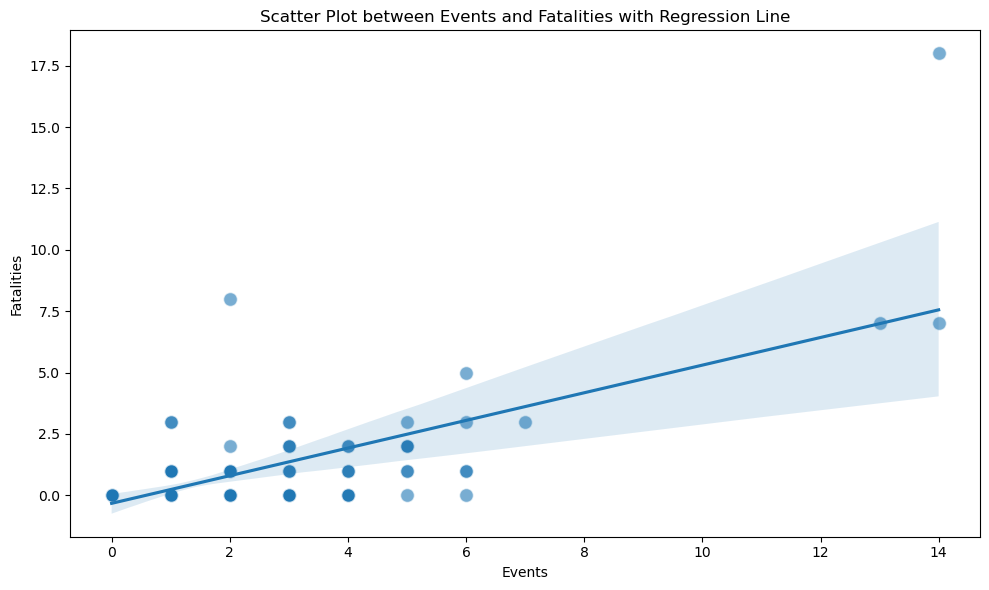

In [98]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create scatter plot with regression line
sns.regplot(x='Events', y='Fatalities', data=data, scatter_kws={'s': 100, 'alpha': 0.6, 'edgecolors': 'w'})

# Adding labels and title
plt.xlabel('Events')
plt.ylabel('Fatalities')
plt.title('Scatter Plot between Events and Fatalities with Regression Line')

# Display the plot
plt.tight_layout()
plt.show()

There is a Linear Relationship between thse two Features.

# Observe the Events & Fatalities AVG Exceeding over Years

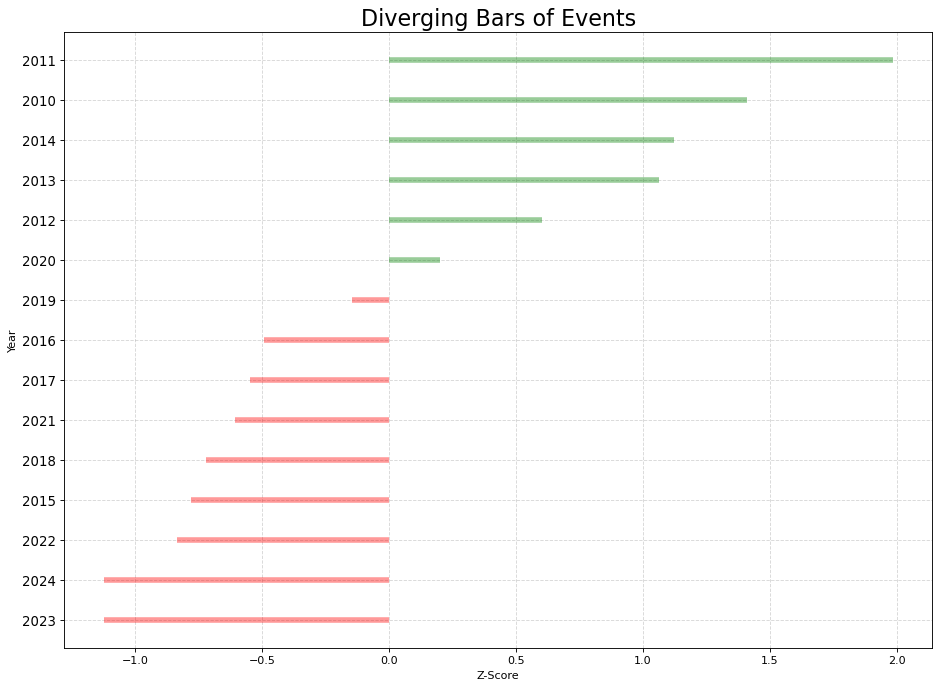

In [99]:
# Assuming 'events' is your dataframe with 'year' and 'Events' columns.
# Calculate the z-scores for 'Events'
events['Events_z'] = (events['Events'] - events['Events'].mean()) / events['Events'].std()

# Assign colors based on the value of 'Events_z'
events['colors'] = ['red' if x < 0 else 'green' for x in events['Events_z']]

# Sort the dataframe by 'Events_z'
events.sort_values('Events_z', inplace=True)
events.reset_index(inplace=True)

# Draw the plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=events.index, xmin=0, xmax=events.Events_z, color=events.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='Year', xlabel='Z-Score')
plt.yticks(events.index, events['Year'], fontsize=12)
plt.title('Diverging Bars of Events', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

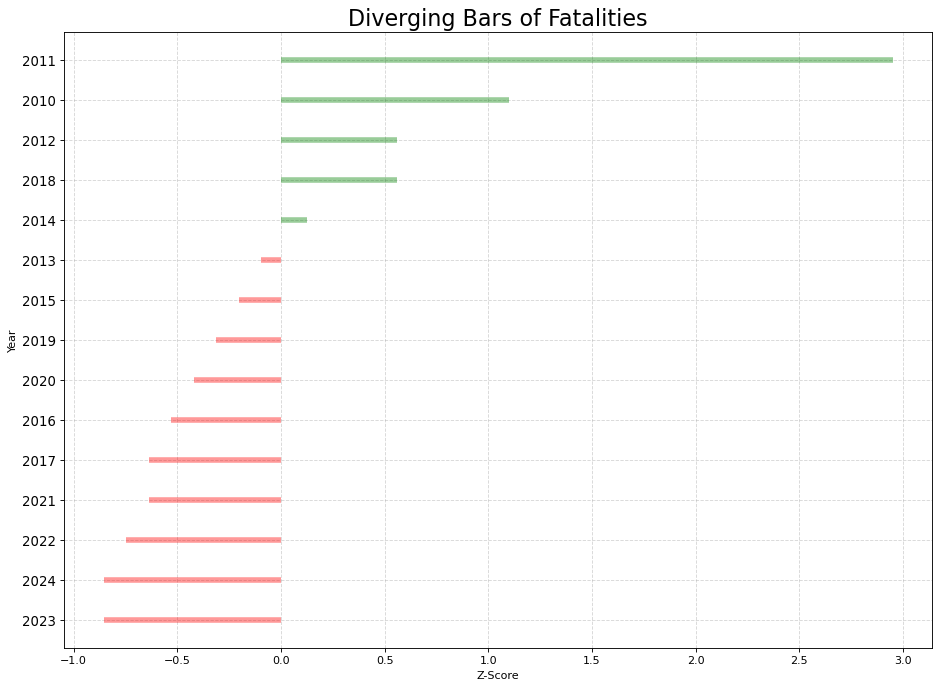

In [100]:
# Assuming 'events' is your dataframe with 'year' and 'Fatalities' columns.
# Calculate the z-scores for 'Fatalities'
events['Fatalities_z'] = (events['Fatalities'] - events['Fatalities'].mean()) / events['Fatalities'].std()

# Assign colors based on the value of 'Fatalities_z'
events['colors'] = ['red' if x < 0 else 'green' for x in events['Fatalities_z']]

# Sort the dataframe by 'Fatalities_z'
events.sort_values('Fatalities_z', inplace=True)

# Reset the index without creating a new 'level_0' column
events.reset_index(drop=True, inplace=True)

# Draw the plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=events.index, xmin=0, xmax=events.Fatalities_z, color=events.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='Year', xlabel='Z-Score')
plt.yticks(events.index, events['Year'], fontsize=12)
plt.title('Diverging Bars of Fatalities', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

Green bars indicate the years where the number of fatalities or events exceeds the average, while red bars indicate the years where the number is below the average. In the majority of cases, when events exceed the average, fatalities also exceed the average.